# 지하철 이용객 분석
- https://data.busan.go.kr/
- 승하차 인원정보 검색
- 일별역별시간대별승하차 파일 받기
- 최신 csv 파일로 받기
  
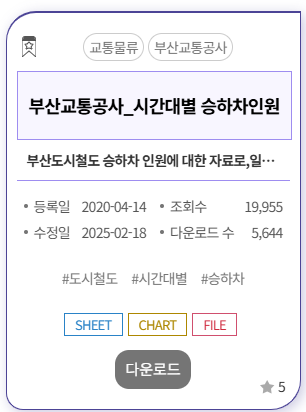

In [1]:
import pandas as pd
file_path = "./ref/일별역별시간대별승하차인원(2025년1월).csv"
df = pd.read_csv(file_path,encoding="EUC-KR")
df.head() # 맨앞 데이터 5개 가져오기
# data.tail() #맨뒤 데이터 5개 가져오기

,역번호,역명,년월일,요일,구분,합계,01시-02시,02시-03시,03시-04시,04시-05시,...,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,24시-01시
0,95,다대포해수욕장,2025-01-01,수,승차,8126,0,1,0,14,...,527,498,517,266,170,98,79,38,10,0
1,95,다대포해수욕장,2025-01-01,수,하차,7674,0,1,0,0,...,376,357,295,185,132,81,74,50,71,46
2,95,다대포해수욕장,2025-01-02,목,승차,4893,1,0,0,21,...,472,364,373,210,159,87,90,57,13,0
3,95,다대포해수욕장,2025-01-02,목,하차,3965,1,4,0,1,...,311,339,296,321,239,143,99,92,82,49
4,95,다대포해수욕장,2025-01-03,금,승차,4572,0,0,0,27,...,401,300,363,237,139,102,70,69,13,0


In [2]:
columns = ['num','name','date','week','type','total']
time_col = [f"{i}~{i+1}H" for i in range(1,24)]
columns = columns + time_col + ['24~01H']
df.columns = columns
df = df.loc[:,:'total']

In [3]:
df.tail()

,num,name,date,week,type,total
6939,414,안평,2025-01-29,수,하차,799
6940,414,안평,2025-01-30,목,승차,1041
6941,414,안평,2025-01-30,목,하차,996
6942,414,안평,2025-01-31,금,승차,1898
6943,414,안평,2025-01-31,금,하차,1773


In [4]:
data = df.groupby(['num','name','date']).sum().reset_index()
data[data['date']=='2025-01-01']
data

,num,name,date,week,type,total
0,95,다대포해수욕장,2025-01-01,수수,승차하차,15800
1,95,다대포해수욕장,2025-01-02,목목,승차하차,8858
2,95,다대포해수욕장,2025-01-03,금금,승차하차,8279
3,95,다대포해수욕장,2025-01-04,토토,승차하차,8477
4,95,다대포해수욕장,2025-01-05,일일,승차하차,6912
...,...,...,...,...,...,...
3467,414,안평,2025-01-27,월월,승차하차,2716
3468,414,안평,2025-01-28,화화,승차하차,1987
3469,414,안평,2025-01-29,수수,승차하차,1633
3470,414,안평,2025-01-30,목목,승차하차,2037


In [5]:
gdata = data[['name', 'date','total']]
gdata = gdata.sort_values(by=['name','date'], ascending=[True,True])
gdata.head(10)

,name,date,total
1860,가야,2025-01-01,3953
1861,가야,2025-01-02,7242
1862,가야,2025-01-03,7293
1863,가야,2025-01-04,5609
1864,가야,2025-01-05,3945
1865,가야,2025-01-06,7469
1866,가야,2025-01-07,7217
1867,가야,2025-01-08,7324
1868,가야,2025-01-09,7110
1869,가야,2025-01-10,7052


In [6]:
mdata = gdata.groupby(by="name").sum().reset_index()
tdata = mdata[['name','total']]
tdata

,name,total
0,가야,194925
1,감전,211937
2,강서구청,140162
3,개금,442819
4,거제,313595
...,...,...
103,토성,436698
104,하단,1003733
105,해운대,803371
106,호포,67287


In [7]:
sdata = tdata.sort_values(by='total', ascending=False)
sdata.head(20)
total_data = sdata[:20]
total_data

,name,total
70,서면,3626209
83,연산,1500575
61,부산역,1337149
65,사상,1230792
36,동래,1089751
72,센텀시티,1083780
88,자갈치,1070458
23,남포,1045512
64,부전,1008329
104,하단,1003733


In [8]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

d2_path = "./ref/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(d2_path)
plt.rcParams["font.family"] = "D2Coding"

In [9]:
# for font in fm.findSystemFonts():
#     print(font)
# print(plt.rcParams["font.family"])

In [10]:
# ! pip install squarify

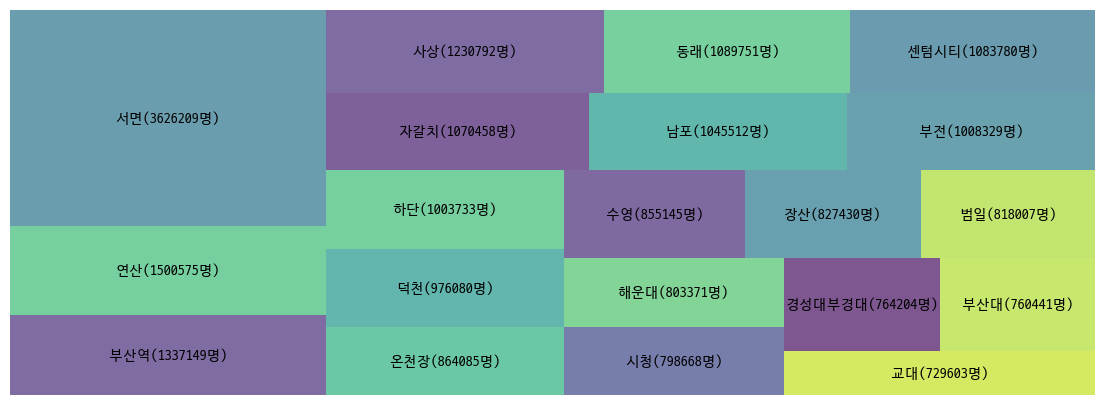

In [11]:
import squarify
plt.figure(figsize=(14,5))
squarify.plot(sizes=total_data['total'], label= [f"{x[0]}({x[1]}명)" for x in zip (total_data['name'], total_data['total'])], alpha=0.7)
plt.rcParams['font.size']= 10
# plt.rcParams['text.color']='black'
plt.gca().invert_yaxis()
plt.axis("off")
plt.show()

부산 지하철 이용객 분석 데이터를 확인해 보면 역별 이용객으로는 서면으로 보고 있습니다. 서면은 부산의 중심지라고 볼 수 있어서 가장 큰 지하철이용량을 보여주고 있습니다. 전반적으로 2호선이 높은 사용량을 보여주고 있으며 대학교 앞 지하철의 사용량도 높은 사용량을 띄고 있습니다. 그리고 2호선에 있는 사상역 같은 경우에는 부산서부터미널이나 김해공항으로 갈 수 있는 전철이기 때문에 사람들이 많이 이용하고, 부산역도 사람들이 KTX을 이용하기 때문에 그나마 많은 사람들이 이용할 수 있는 거 같습니다. 

In [37]:
# 인천 지하철 2호선
import pandas as pd
file_path = "./ref/인천교통공사_2호선 일별 승하차 현황_2024-07-26.csv"
df = pd.read_csv(file_path,encoding="EUC-KR")
df.head()

,역명,일자,이용인원,승차인원,하차인원
0,검단오류(검단산업단지),2023-06-01,5939,2924,3015
1,왕길,2023-06-01,5337,2680,2657
2,검단사거리,2023-06-01,17334,9047,8287
3,마전,2023-06-01,9345,4552,4793
4,완정,2023-06-01,16736,8660,8076


In [16]:
columns = ['name','date','total','get in','get off']
df.columns = columns
df = df.loc[:,:'get off']

In [17]:
df.tail()

,name,date,total,get in,get off
10687,모래내시장,2024-06-30,9667,4791,4876
10688,만수,2024-06-30,5461,2814,2647
10689,남동구청,2024-06-30,4079,2108,1971
10690,인천대공원,2024-06-30,4083,2039,2044
10691,운연(서창),2024-06-30,1216,648,568


In [18]:
data = df.groupby(['name', 'date', 'total']).sum().reset_index()
data = data[data['date'] == '2023-06-01']
data

,name,date,total,get in,get off
0,가재울,2023-06-01,7512,3802,3710
396,가정(루원시티),2023-06-01,23803,12223,11580
792,가정중앙시장,2023-06-01,11853,5673,6180
1188,검단사거리,2023-06-01,17334,9047,8287
1584,검단오류(검단산업단지),2023-06-01,5939,2924,3015
1980,검바위,2023-06-01,7803,3745,4058
2376,검암,2023-06-01,5948,3191,2757
2772,남동구청,2023-06-01,9088,4731,4357
3168,독정,2023-06-01,8338,4125,4213
3564,마전,2023-06-01,9345,4552,4793


In [19]:
gdata = data[['name','date','total']]
gdata = gdata.sort_values(by=['name','date'],ascending=[True,True])
gdata.head(10)

,name,date,total
0,가재울,2023-06-01,7512
396,가정(루원시티),2023-06-01,23803
792,가정중앙시장,2023-06-01,11853
1188,검단사거리,2023-06-01,17334
1584,검단오류(검단산업단지),2023-06-01,5939
1980,검바위,2023-06-01,7803
2376,검암,2023-06-01,5948
2772,남동구청,2023-06-01,9088
3168,독정,2023-06-01,8338
3564,마전,2023-06-01,9345


In [20]:
mdata = gdata.groupby(by="name").sum().reset_index()
tdata = mdata[['name','total']]
tdata

,name,total
0,가재울,7512
1,가정(루원시티),23803
2,가정중앙시장,11853
3,검단사거리,17334
4,검단오류(검단산업단지),5939
5,검바위,7803
6,검암,5948
7,남동구청,9088
8,독정,8338
9,마전,9345


In [21]:
sdata = tdata.sort_values(by='total',ascending=False)
sdata.head(20)
total_data = sdata[:20]
total_data

,name,total
1,가정(루원시티),23803
17,시민공원(문화창작지대),19127
3,검단사거리,17334
12,서구청,17285
25,주안,17033
19,완정,16736
11,모래내시장,16104
2,가정중앙시장,11853
10,만수,10388
18,아시아드경기장(공촌사거리),9792


In [26]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

d2_path = "./ref/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(d2_path)
plt.rcParams["font.family"] = "D2Coding"

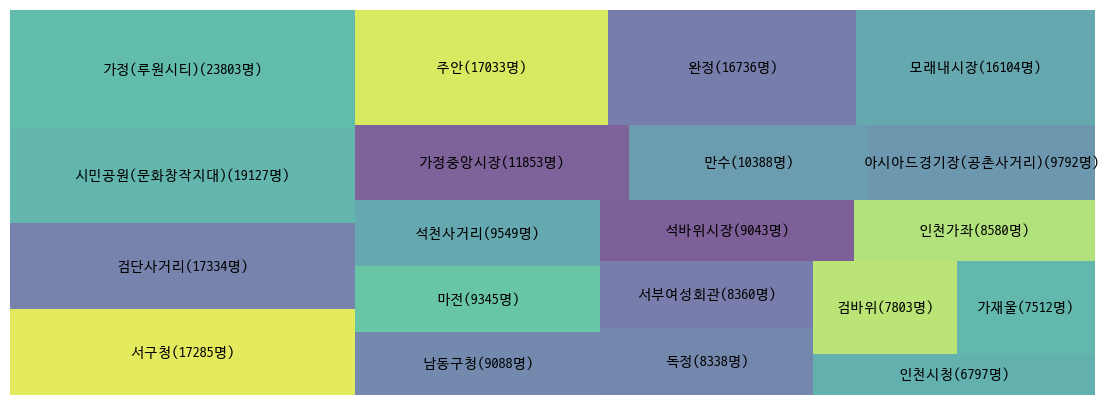

In [27]:
import squarify
plt.figure(figsize=(14,5))
squarify.plot(sizes=total_data['total'], label= [f"{x[0]}({x[1]}명)" for x in zip (total_data['name'], total_data['total'])], alpha=0.7)
plt.rcParams['font.size']= 10
plt.rcParams['text.color']='black'
plt.gca().invert_yaxis()
plt.axis("off")
plt.show()

- 위 그림을 보면 인천 지하철 2호선에서 이용객 수가 가장 많은 역은 가정(루원시티)입니다. 그 다음으로는 시민공원(문화창작지대), 검단사거리, 서구청으로 보입니다. 하지만 검단사거리와 서구청은 조금씩 차이가 나지만, 가장 많이 이용한 역인 가정(루원시티)역도, 시민공원(문화창작지대)역과는 이용객 차이는 4000명 이외로 차이가 나는 것으로 보입니다.
- 인천 지하철 2호선에서 이용객 수가 적은 역은 인천시청역입니다. 

In [38]:
# 인천 지하철 1호선
import pandas as pd
file_path = "./ref/인천교통공사_1호선 일별 승하차현황_20240630.csv"
df = pd.read_csv(file_path,encoding="EUC-KR")
df.head()

,역명,일자,이용인원,승차인원,하차인원
0,계양,2023-06-01,8360,4264,4096
1,귤현,2023-06-01,2793,1084,1709
2,박촌,2023-06-01,7998,4206,3792
3,임학,2023-06-01,16947,8552,8395
4,계산,2023-06-01,23140,11764,11376


In [29]:
columns = ['name','date','total','get in','get off']
df.columns = columns 
df = df.loc[:,:'get off']

In [30]:
df.tail()

,name,date,total,get in,get off
11875,지식정보단지,2024-06-30,2808,1377,1431
11876,인천대입구,2024-06-30,7030,3415,3615
11877,센트럴파크(재외동포청),2024-06-30,4577,2240,2337
11878,국제업무지구,2024-06-30,1083,585,498
11879,송도달빛축제공원,2024-06-30,5804,2871,2933


In [31]:
data = df.groupby(['name','date','total']).sum().reset_index()
data = data[data['date'] == '2023-06-01']
data

,name,date,total,get in,get off
0,간석오거리,2023-06-01,23044,11970,11074
396,갈산,2023-06-01,19852,10004,9848
792,경인교대입구,2023-06-01,12189,6120,6069
1188,계산,2023-06-01,23140,11764,11376
1584,계양,2023-06-01,8360,4264,4096
1980,국제업무지구,2023-06-01,3447,1777,1670
2376,귤현,2023-06-01,2793,1084,1709
2772,동막,2023-06-01,11229,5971,5258
3168,동수,2023-06-01,8518,4370,4148
3564,동춘,2023-06-01,21601,10486,11115


In [32]:
gdata = data[['name','date','total']]
gdata = gdata.sort_values(by=['name','date'],ascending=[True,True])
gdata.head(10)

,name,date,total
0,간석오거리,2023-06-01,23044
396,갈산,2023-06-01,19852
792,경인교대입구,2023-06-01,12189
1188,계산,2023-06-01,23140
1584,계양,2023-06-01,8360
1980,국제업무지구,2023-06-01,3447
2376,귤현,2023-06-01,2793
2772,동막,2023-06-01,11229
3168,동수,2023-06-01,8518
3564,동춘,2023-06-01,21601


In [33]:
mdata = gdata.groupby(by="name").sum().reset_index()
tdata = mdata[['name','total']]
tdata

,name,total
0,간석오거리,23044
1,갈산,19852
2,경인교대입구,12189
3,계산,23140
4,계양,8360
5,국제업무지구,3447
6,귤현,2793
7,동막,11229
8,동수,8518
9,동춘,21601


In [34]:
sdata = tdata.sort_values(by='total',ascending=False)
sdata.head(20)
total_data = sdata[:20]
total_data

,name,total
26,작전,29115
15,부평시장,27782
24,인천터미널,27122
20,예술회관,23912
3,계산,23140
0,간석오거리,23044
29,테크노파크,22082
9,동춘,21601
1,갈산,19852
22,인천대입구,18744


In [35]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

d2_path = "./ref/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(d2_path)
plt.rcParams["font.family"] = "D2Coding"

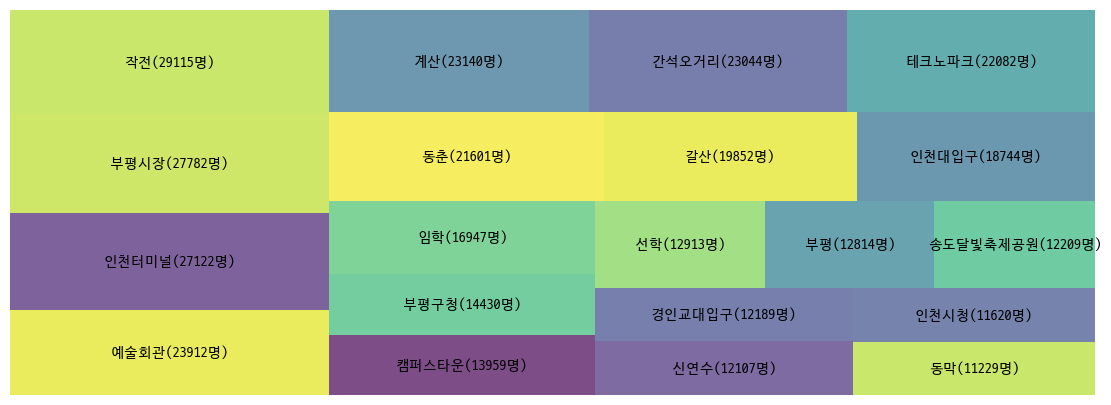

In [39]:
import squarify
plt.figure(figsize=(14,5))
squarify.plot(sizes=total_data['total'], label= [f"{x[0]}({x[1]}명)" for x in zip (total_data['name'], total_data['total'])], alpha=0.7)
plt.rcParams['font.size']= 10
# plt.rcParams['text.color']='black'
plt.gca().invert_yaxis()
plt.axis("off")
plt.show()

- 위 그림을 보면 인천 지하철 1호선에서 사람들이 가장 많이 이용한 역은 작전역이고, 그 다음으로는 부평시장, 인천터미널, 예술회관 등으로 보고 있습니다. 작전역은 사람들이 많이 이용하는 역으로 보고 있고, 하지만 부평시장은 사람들이 물건을 많이 사러 갈 수 있기 때문에 사람들이 두번째로 많이 이용하는 거 같고, 인천터미널 같은 경우에는 사람들이 시외버스를 타러 가는 것이 대부분이기 때문에 세번째로 많은 거 같습니다.
- 작전역, 부평시장역, 인천터미널역, 예술회관역 같은 경우에는 이용하는 사람들이 차이가 없는 것으로 보입니다.
- 인천 지하철 1호선에서 가장 적은 역은 동막역입니다. 